### Perform some simple data analysis
### Explore a variety of baseline classifiers including:
##### 1. Logistic Regression
##### 2. Random Forests
##### 3. SVM
##### 4. Feedforward Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
#
import keras

import os; 
# work-around to allow import from directory on same level
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
from input.DataLoader import DataLoader


C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
# first 6 days of data are training set. Days 7 and 8 are dev set
traindays=[0,1,2,3,4,5]
devdays=[6,7]

In [3]:
path='../data/'
d=DataLoader(path)
traindf=d.get_days(traindays)
devdf=d.get_days(devdays)


In [4]:
print(traindf.shape)
print(traindf.info())
traindf.head()

(217404, 149)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217404 entries, 0 to 39151
Columns: 149 entries, 0 to 148
dtypes: float64(149)
memory usage: 248.8 MB
None


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.408275,-0.509405,0.403577,-0.479331,0.409877,-0.663252,0.402914,-0.37744,0.409493,-0.787505,...,-0.879782,-0.887778,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,0.408275,-0.604272,0.403577,-0.479331,0.410898,-0.683978,0.402914,-0.37744,0.410513,-0.799630,...,0.381572,0.370280,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.407254,-0.663731,0.403577,-0.479331,0.406815,-0.663252,0.402914,-0.37744,0.407452,-0.695636,...,-0.862017,-0.870059,0.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0
3,0.407254,-0.530115,0.403577,-0.479331,0.408857,-0.238357,0.402914,-0.37744,0.409493,-0.467596,...,0.383221,0.371925,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0
4,0.407254,-0.530115,0.403577,-0.479331,0.408857,-0.238357,0.402914,-0.37744,0.409493,-0.467596,...,-0.479532,-0.488573,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0


In [5]:
print(devdf.shape)
print(devdf.info())
devdf.head()

(92824, 149)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92824 entries, 0 to 55477
Columns: 149 entries, 0 to 148
dtypes: float64(149)
memory usage: 106.2 MB
None


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.389172,-0.452436,0.388724,-0.447651,0.389772,-0.428775,0.388133,-0.701167,0.389413,-0.735306,...,3.018889,3.001688,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,0.388174,-0.526207,0.388724,-0.447651,0.387775,-0.783873,0.388133,-0.701167,0.388415,-0.652805,...,-0.742902,-0.751683,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.390171,-0.496699,0.392725,-0.479606,0.389772,-0.116564,0.390134,-0.544829,0.389413,-0.735306,...,0.431071,1.688134,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
3,0.388174,-0.526207,0.388724,-0.447651,0.388773,-0.766718,0.388133,-0.701167,0.388415,-0.360815,...,-0.801795,-0.810791,0.0,0.0,0.0,3.0,3.0,1.0,2.0,2.0
4,0.390171,-0.489322,0.388724,-0.447651,0.389772,-0.116564,0.388133,-0.701167,0.389413,-0.735306,...,-0.786539,-0.824403,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0


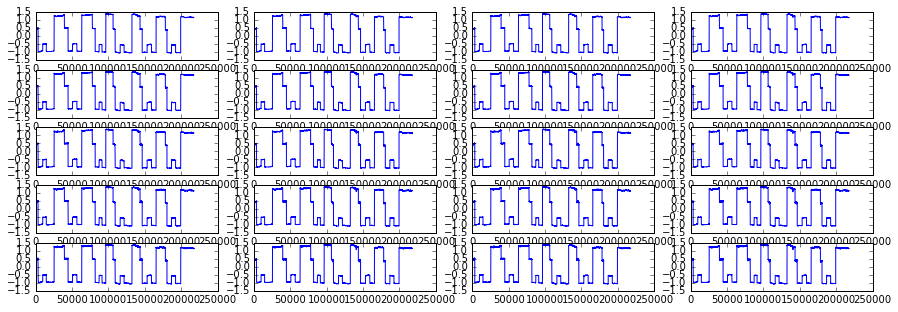

In [6]:
#plot rows containing book levels - note the breaks between the 5 stocks
fig=plt.figure(figsize=(15,5))
xaxis=np.arange(traindf.shape[0])
for i in np.arange(20):
     plt.subplot(5,4,i+1)
     plt.plot(xaxis,traindf.iloc[:,i*2])

In [7]:
train_stk_ind=d.get_stock_index(traindays)
dev_stk_ind=d.get_stock_index(devdays)
#flatten the lists of stock indices (change the function to return the flattened list)
t  = np.array([val for sublist in train_stk_ind for val in sublist])


### Snapshot of Order Book Data

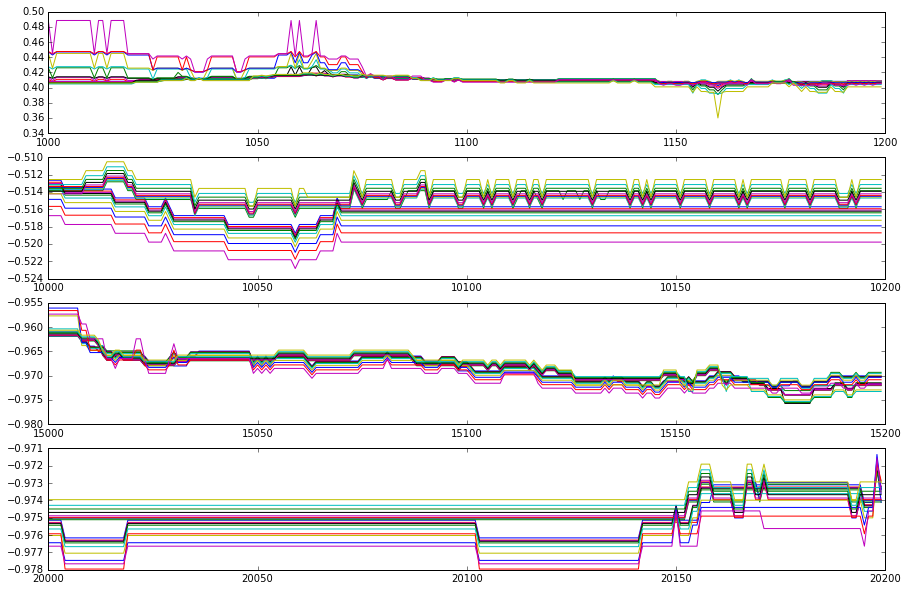

In [8]:
# plot 200 orderbook snapshots at 4 arbitrary locations
fig,axes=plt.subplots(4,1,figsize=(15,10))
x=[i+np.arange(200) for i in [1000,10000,15000,20000]]
for h,i in enumerate(x):
    for j in np.arange(20):
        axes[h].plot(i,traindf.iloc[i][j*2])

### Plot all the bids/asks for each ticker over all days in train set

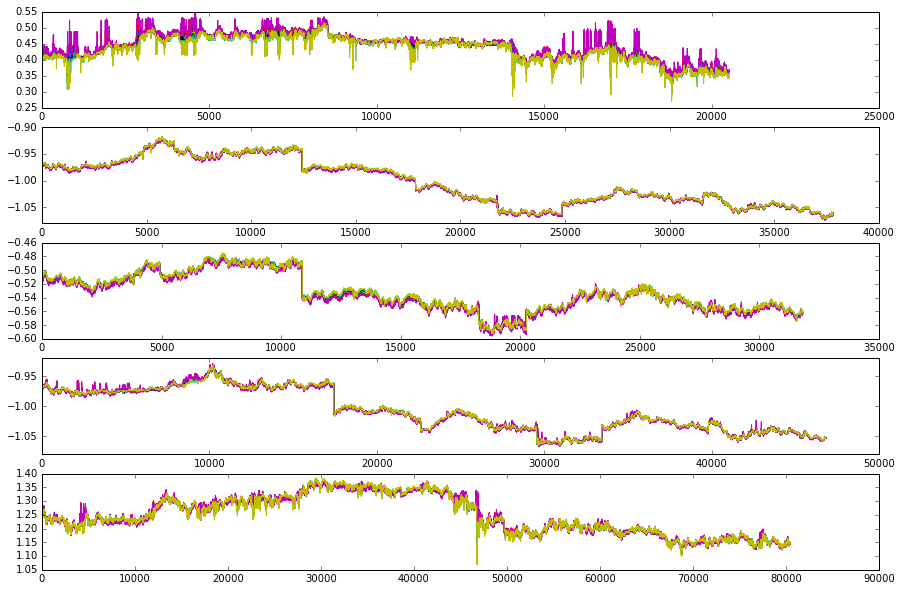

In [9]:
fig,axes=plt.subplots(5,1,figsize=(15,10))
for i in range(5):
    x=np.arange(np.sum(t==i))
    for j in np.arange(20):
        axes[i].plot(x,traindf.iloc[t==i][j*2])


### Distribution of Outcomes

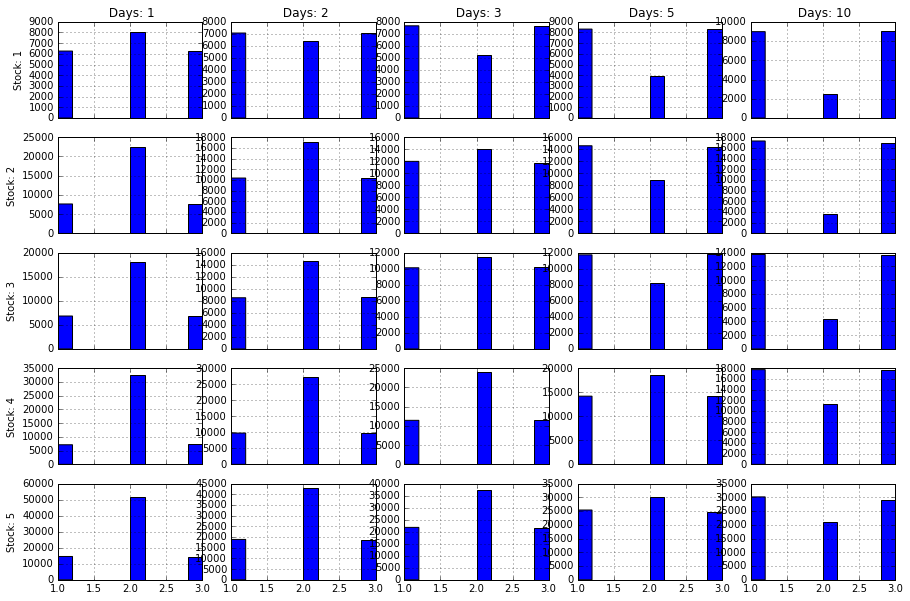

In [10]:
#histogram of 5 targets for each of 5 stocks
#notice that the number of unchanged entries (value 2) declines as we go from 1 day to 10-days
horizon=[1,2,3,5,10]
fig,axes=plt.subplots(5,5,figsize=(15,10),sharex=True)
for i in range(5):
    ti=t==i
    for j,k in enumerate([144,145,146,147,148]):
        traindf.loc[ti][k].hist(ax=axes[i,j])
        if i==0:
            axes[0,j].set_title(' Days: '+ str(horizon[j]))
        if j==0:
            axes[i,0].set_ylabel('Stock: '+str(i+1))
        #start=i

In [11]:
xdata=range(144)
ydata=[144,145,146,147,148]


In [12]:
def run_model(clf,Xtrain,Ytrain,Xdev,Ydev):
    
    model = clf.fit(Xtrain, Ytrain)

    # How well have we done on training data
    print ("Training ", i,)
    print("rows are y, columns are yhat")
    Yhat=model.predict(Xtrain)
    c=confusion_matrix(Ytrain,Yhat)
    c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
    c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
    print(c)
    print(classification_report(Yhat,Ytrain))
    print("cohen kappa score:",cohen_kappa_score(Yhat,Ytrain))
    # How well have we done on Validation data
    print("Test ", i)
    print("rows are y, columns are yhat")
    Yhat=model.predict(Xdev)
    c=confusion_matrix(Ydev,Yhat)
    c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
    c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
    print(c)
    print(classification_report(Yhat,Ydev))
    print("cohen kappa score:",cohen_kappa_score(Yhat,Ydev))

### Logistic Regression

In [28]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',
                       solver='newton-cg',class_weight='balanced',max_iter=1000)

In [29]:
#train on each target 
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)

   

Training  0
rows are y, columns are yhat
[[ 18016  12234  12187  42437]
 [ 32350  66287  33792 132429]
 [ 11601  12122  18815  42538]
 [ 61967  90643  64794 217404]]
             precision    recall  f1-score   support

        1.0       0.42      0.29      0.35     61967
        2.0       0.50      0.73      0.59     90643
        3.0       0.44      0.29      0.35     64794

avg / total       0.46      0.47      0.45    217404

cohen kappa score: 0.16832236233788123
Test  0
rows are y, columns are yhat
[[ 5922  5217  4493 15632]
 [13926 33069 15403 62398]
 [ 3744  4442  6608 14794]
 [23592 42728 26504 92824]]
             precision    recall  f1-score   support

        1.0       0.38      0.25      0.30     23592
        2.0       0.53      0.77      0.63     42728
        3.0       0.45      0.25      0.32     26504

avg / total       0.47      0.49      0.46     92824

cohen kappa score: 0.15525316902656106
Training  1
rows are y, columns are yhat
[[ 21381  19361  13837  54579]
 [

### Random Forest

In [31]:
# Create random forests object
clf = RandomForestClassifier(n_estimators=100, max_depth=3,class_weight='balanced',random_state=0)



In [32]:
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)
    
    
  

Training  0
rows are y, columns are yhat
[[ 11735  21177   9525  42437]
 [ 13760 104744  13925 132429]
 [  9239  20805  12494  42538]
 [ 34734 146726  35944 217404]]
             precision    recall  f1-score   support

        1.0       0.28      0.34      0.30     34734
        2.0       0.79      0.71      0.75    146726
        3.0       0.29      0.35      0.32     35944

avg / total       0.63      0.59      0.61    217404

cohen kappa score: 0.225747539599072
Test  0
rows are y, columns are yhat
[[ 8715   575  6342 15632]
 [29742  5639 27017 62398]
 [ 6513   529  7752 14794]
 [44970  6743 41111 92824]]
             precision    recall  f1-score   support

        1.0       0.56      0.19      0.29     44970
        2.0       0.09      0.84      0.16      6743
        3.0       0.52      0.19      0.28     41111

avg / total       0.51      0.24      0.27     92824

cohen kappa score: 0.04648937811214526
Training  1
rows are y, columns are yhat
[[ 21472  24166   8941  54579]
 [  

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  2
rows are y, columns are yhat
[[ 21049  30426  11531  63006]
 [  7693  76856   7334  91883]
 [ 11190  30369  20956  62515]
 [ 39932 137651  39821 217404]]
             precision    recall  f1-score   support

        1.0       0.33      0.53      0.41     39932
        2.0       0.84      0.56      0.67    137651
        3.0       0.34      0.53      0.41     39821

avg / total       0.65      0.55      0.57    217404

cohen kappa score: 0.2765056453067175
Test  2
rows are y, columns are yhat
[[20967     0  2566 23533]
 [46136     0  1547 47683]
 [16736     0  4872 21608]
 [83839     0  8985 92824]]
             precision    recall  f1-score   support

        1.0       0.89      0.25      0.39     83839
        2.0       0.00      0.00      0.00         0
        3.0       0.23      0.54      0.32      8985

avg / total       0.83      0.28      0.38     92824

cohen kappa score: 0.035872598722005766


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  3
rows are y, columns are yhat
[[ 19770  41461  12965  74196]
 [  5330  59243   5242  69815]
 [ 12215  41114  20064  73393]
 [ 37315 141818  38271 217404]]
             precision    recall  f1-score   support

        1.0       0.27      0.53      0.35     37315
        2.0       0.85      0.42      0.56    141818
        3.0       0.27      0.52      0.36     38271

avg / total       0.65      0.46      0.49    217404

cohen kappa score: 0.190689605421006
Test  3
rows are y, columns are yhat
[[23558     1  4384 27943]
 [36703     1  2584 39288]
 [19244     0  6349 25593]
 [79505     2 13317 92824]]
             precision    recall  f1-score   support

        1.0       0.84      0.30      0.44     79505
        2.0       0.00      0.50      0.00         2
        3.0       0.25      0.48      0.33     13317

avg / total       0.76      0.32      0.42     92824

cohen kappa score: 0.03529550149273819
Training  4
rows are y, columns are yhat
[[ 34572  28246  25079  87897]
 [ 1

In [17]:

#imp=np.flip(np.argsort(clf.feature_importances_),axis=0)[:10] #top 10 features
#plt.plot(np.sort(clf.feature_importances_))

### SVM

In [18]:
# Create multinomial logistic regression object
clf = svm.LinearSVC()

In [19]:
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)
    

Training  0
rows are y, columns are yhat
[[  1965  38923   1549  42437]
 [  1169 129895   1365 132429]
 [  1364  38839   2335  42538]
 [  4498 207657   5249 217404]]
             precision    recall  f1-score   support

        1.0       0.05      0.44      0.08      4498
        2.0       0.98      0.63      0.76    207657
        3.0       0.05      0.44      0.10      5249

avg / total       0.94      0.62      0.73    217404

cohen kappa score: 0.06514330868907314
Test  0
rows are y, columns are yhat
[[  304 14789   539 15632]
 [  166 61780   452 62398]
 [  223 13807   764 14794]
 [  693 90376  1755 92824]]
             precision    recall  f1-score   support

        1.0       0.02      0.44      0.04       693
        2.0       0.99      0.68      0.81     90376
        3.0       0.05      0.44      0.09      1755

avg / total       0.97      0.68      0.79     92824

cohen kappa score: 0.05364388558054678
Training  1
rows are y, columns are yhat
[[ 10170  39292   5117  54579]
 [

### Feed Forward Neural Network


In [20]:
i=148 # train on longest horizon (10-days)
Ytrain_label=traindf.iloc[:,i].values-1 # make labels 0 to 2
Ydev_label=devdf.iloc[:,i].values-1 # make labels 0 to 2
Ytrain_onehot=keras.utils.to_categorical(Ytrain_label) # use longest horizon
Ydev_onehot=keras.utils.to_categorical(Ydev_label) # use longest horizon

In [21]:
# dropout with 50% rate had big impact on overfitting
# batchnorm didn't seem to add anything
from keras import regularizers
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=100,
        input_dim=len(xdata),
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'))

model.add(
    keras.layers.Dropout(rate=0.5))

#model.add(
#    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,
#                   center=True, scale=True, beta_initializer='zeros', ))

model.add(
    keras.layers.Dense(
        units=100,
        input_dim=100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'))

model.add(
    keras.layers.Dropout(rate=0.5))

#model.add(
#    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,
#                  center=True, scale=True, beta_initializer='zeros', ))


model.add(
   keras.layers.Dense(
       units=Ytrain_onehot.shape[1],
       input_dim=100,
       kernel_initializer='glorot_uniform',
       bias_initializer='zeros',
       activation='softmax'))

In [22]:
#sgd with momentum actually works slightly better than adam with these parameters
sgd_optimizer=keras.optimizers.SGD(lr=0.001,decay=1e-7,momentum=0.9)
#adam_optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


In [23]:
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy')

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               14500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 24,903
Trainable params: 24,903
Non-trainable params: 0
_________________________________________________________________


In [25]:
history=model.fit(traindf.iloc[:,xdata].values,Ytrain_onehot,batch_size=64,epochs=50,
                      validation_data=(devdf.iloc[:,xdata].values,Ydev_onehot),verbose=2)

Train on 217404 samples, validate on 92824 samples
Epoch 1/50
 - 8s - loss: 2.2297 - val_loss: 1.6371
Epoch 2/50
 - 8s - loss: 1.3240 - val_loss: 1.2246
Epoch 3/50
 - 8s - loss: 1.0930 - val_loss: 1.1152
Epoch 4/50
 - 8s - loss: 1.0324 - val_loss: 1.0924
Epoch 5/50
 - 8s - loss: 1.0163 - val_loss: 1.0854
Epoch 6/50
 - 8s - loss: 1.0108 - val_loss: 1.0811
Epoch 7/50
 - 8s - loss: 1.0090 - val_loss: 1.0740
Epoch 8/50
 - 7s - loss: 1.0073 - val_loss: 1.0741
Epoch 9/50
 - 7s - loss: 1.0066 - val_loss: 1.0847
Epoch 10/50
 - 8s - loss: 1.0065 - val_loss: 1.0733
Epoch 11/50
 - 8s - loss: 1.0050 - val_loss: 1.0790
Epoch 12/50
 - 8s - loss: 1.0047 - val_loss: 1.0845
Epoch 13/50
 - 8s - loss: 1.0043 - val_loss: 1.0800
Epoch 14/50
 - 7s - loss: 1.0041 - val_loss: 1.0762
Epoch 15/50
 - 7s - loss: 1.0033 - val_loss: 1.0719
Epoch 16/50
 - 8s - loss: 1.0033 - val_loss: 1.0770
Epoch 17/50
 - 8s - loss: 1.0025 - val_loss: 1.0731
Epoch 18/50
 - 8s - loss: 1.0024 - val_loss: 1.0742
Epoch 19/50
 - 8s - lo

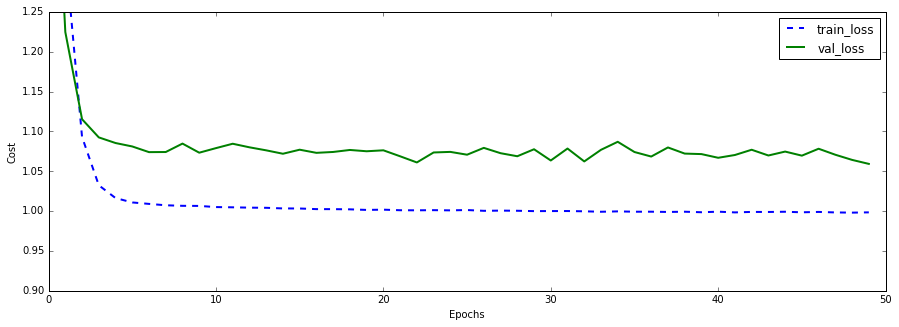

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'],'b--',lw=2,label='train_loss')
plt.plot(history.history['val_loss'],'g-',lw=2,label='val_loss')
plt.legend()
plt.ylim([.9,1.25])
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [27]:
 # How well have we done on training data
print ("Training ", i)
Yhat=model.predict(traindf.iloc[:,xdata].values)
Yhat=np.argmax(Yhat,axis=1)
c=confusion_matrix(Ytrain_label,Yhat)
c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
print(c)
print(classification_report(Yhat,Ytrain_label))
print("cohen kappa score:",cohen_kappa_score(Yhat,Ytrain_label))
# How well have we done on test data
print("Test ", i)
Yhat=model.predict(devdf.iloc[:,xdata].values) 
Yhat=np.argmax(Yhat,axis=1)
c=confusion_matrix(Ydev_label,Yhat)
c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
print(c)
print(classification_report(Yhat,Ydev_label))
print("cohen kappa score:",cohen_kappa_score(Yhat,Ydev_label))

Training  148
[[ 53761   5740  28396  87897]
 [ 17694   9669  15605  42968]
 [ 30168   5343  51028  86539]
 [101623  20752  95029 217404]]
             precision    recall  f1-score   support

          0       0.61      0.53      0.57    101623
          1       0.23      0.47      0.30     20752
          2       0.59      0.54      0.56     95029

avg / total       0.57      0.53      0.54    217404

cohen kappa score: 0.23397134427185495
Test  148
[[20048  2144 11793 33985]
 [13147  3632 11154 27933]
 [10964  1770 18172 30906]
 [44159  7546 41119 92824]]
             precision    recall  f1-score   support

          0       0.59      0.45      0.51     44159
          1       0.13      0.48      0.20      7546
          2       0.59      0.44      0.50     41119

avg / total       0.55      0.45      0.48     92824

cohen kappa score: 0.16019328913133968
